---
# Übungszettel 9, Python Aufgabe
---

**ausgegeben am Mi 17.6.2020 12 Uhr, abzugeben bis Mi 24.6.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: 

Übungsgruppe: Laura Strampe

---

**Einführung**: Im Experiment und den Vorlesungsskripten haben Sie den RLC Schwingkreis bereits ausführlich kennen gelernt:

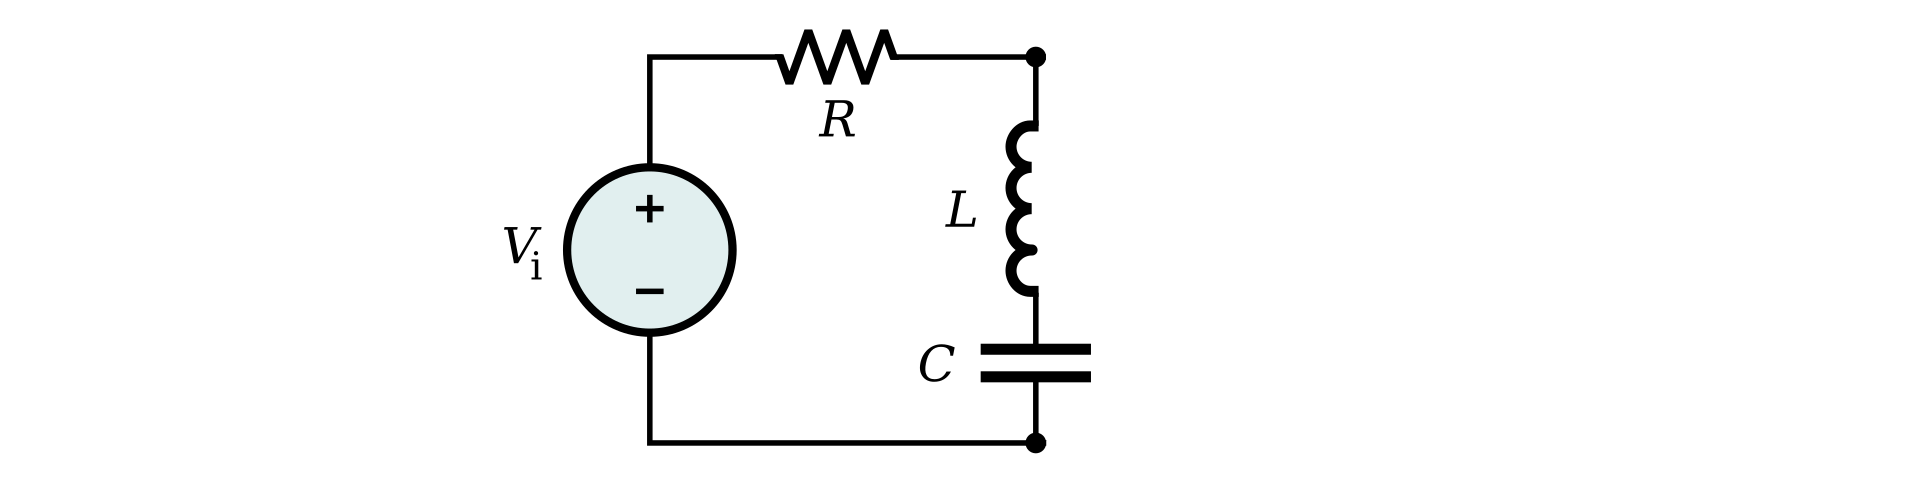

Es kann allerdings trotzdem manchmal etwas schwierig sein sich die Dynamik im Schwingkreis vorzustellen. Wir wollen daher hier versuchen die Spannungen im Schwingkreis animiert darzustellen. Für den einfachen RLC Schwingkreis können Sie die Animationen, auch mit analytischer Rechnung und Animation per Hand erstellen. Für kompliziertere Schaltkreise wird das aber schnell zu aufwendig.

Wir wollen hier die Rechnungen des letzten Aufgabenzettels und Animationsfunktionen von `MatPlotLib` nutzen um eine einfache Animation zu erstellen.

**Aufgabe**: Die Differentialgleichungen für die Spannungen sind:

$$\frac{\textrm{d}V_{R}}{\textrm{d}t}=R\cdot\frac{\textrm{d}I_{R}}{\textrm{d}t}=R\cdot\frac{V_{L}}{L}$$

$$\frac{\textrm{d}V_{C}}{\textrm{d}t}=\frac{I_{C}}{C}=\frac{V_{R}}{R\cdot C}$$

$$\frac{\textrm{d}V_{L}}{\textrm{d}t}=\frac{\textrm{d}V_{i}}{\textrm{d}t}-\frac{\textrm{d}V_{R}}{\textrm{d}t}-\frac{\textrm{d}V_{C}}{\textrm{d}t}=\frac{\textrm{d}V_{i}}{\textrm{d}t}-R\cdot\frac{V_{L}}{L}-\frac{V_{R}}{R\cdot C}$$

1. Schreiben Sie eine Funktion, welche die zeitlichen Ableitungen der Spannungen `V=[V_R,V_C,V_L]` gemäß der Differentialgleichungen mit einer komplexen Eingangsspannung `Vi = np.exp(2j*pi*t*freq)` berechnet.

2. Berechnen Sie die Spannungen (Imaginärteil und Realteil) für die Frequenzen 25, 50 und 100 Hz mit $R = 10$ Ohm, $C = 0.1\times10^{-3}$ F und $L = 0.1$ H für die ersten 10 Perioden.

3. Plotten Sie die Spannungen als eine Animation für jede der Frequenzen in einen Graph der den Imaginärteil der Spannungen gegen den Realteil aufträgt. Nutzen Sie dafür `matplotlib.animation.FuncAnimation`.

4. Beschreiben Sie interessante Beobachtungen, die Sie mit den Animationen machen konnten.

**Vorgehensweise**: Das Vorgehen ist angelehnt an die letzte Python Aufgabe. Wir empfehlen folgendes Vorgehen, dem Sie jedoch nicht folgen müssen:

1. Schreiben Sie eine Funktion `f(t,V,R,C,L,freq)`, welche die zeitlichen Ableitungen der Spannungen `V=[V_R,V_C,V_L]` gemäß der Differentialgleichungen mit einer komplexen Eingangsspannung `Vi = np.exp(2j*pi*t*freq)` berechnet.

2. Berechnen Sie die Spannungen (Imaginärteil und Realteil) für die Frequenzen 25, 50 und 100 Hz mit $R = 10$ Ohm, $C = 0.1\times10^{-3}$ F und $L = 0.1$ H für die ersten 10 Perioden. Nutzen Sie für die Integration `numpy.solve_ivp` mit einem passenden `numpy.linspace` für `t_eval`. Beachten Sie, dass Sie komplexe Startwerte benötigen, also z.B. `[0+0j,0+0j,0+0j]`.

3. Erzeugen Sie eine `figure` für den Plot mit `fig = plt.figure()`. Berechnen Sie die Achsenlimits, setzten Sie diese und setzen Sie das Aspektverhältnis gleich.

4. Schreiben Sie eine Funktion `animate(i)` für den `i`ten Zeitschritt, welche die Achsen mit `ax.clear()` bereinigt (anderfalls plotten Sie immer mehr in jedes Bild) und setzen Sie die `x_lim` und `y_lim` zurück auf die ursprünglichen Werte. Plotten Sie Linien vom Usprung zu Spannungswert vom Widerstand, Kondensator und der Spule.

5. Erzeugen Sie eine Animation mit Hilfe von `matplotlib.animation.FuncAnimation(fig, animate, frames=500, interval=20)`. Wobei wir hier 500 Frames animieren wollen (passen Sie das auf Ihre Simulation an) mit einer Verzögerung von 20 ms pro Frame.

6. Speichern Sie die Animationen mit `anim.save('name.gif', writer='imagemagick')` wobei das erste Argument der Dateiname ist. Beachten Sie, dass das Plotten der Bilder etwas dauern kann.

7. Betrachten Sie die Animationen und notieren Sie interessante Beobachtungen.

**Hilfestellung**: Als Beispiel für die Verwendung von `matplotlib.animation.FuncAnimation` sei hier der animierte Plot der Eingangspannung gezeigt:

NameError: name 'animation' is not defined

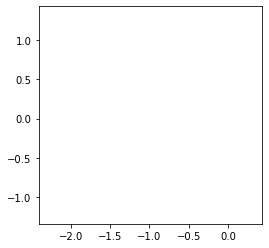

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import electron_mass as e_m,elementary_charge as e_c
from scipy.integrate import solve_ivp

R = 10
C = 0.1e-3
L = 0.1

def f(t,V,R,C,L,freq):
    Vi = np.exp(2j*np.pi*t*freq)
    dVidt = 2j*np.pi*freq*Vi
    return [R*V[2]/L,V[0]/(R*C),dVidt-R*V[2]/L-V[0]/(R*C)]


def A(R,C,L,freq):
    x0 = np.array([0+0.00000001j,0+0.00000001j,0+0.00000001j])
    T = 1/freq
    t_end = 10*T
    sol = solve_ivp(f,[0,t_end],x0,t_eval = np.linspace(0,t_end,1000),args=(R,C,L,freq))
    return sol



####25 Hz
v = A(R,C,L,25).y
int_v_real = [np.min(v.real), np.max(v.real)]
int_v_imag = [np.min(v.imag), np.max(v.imag)]

fig = plt.figure()
ax = plt.axes(xlim=int_v_real, ylim=int_v_imag)
ax.set_aspect('equal')

def animate(i):
    # clear graph
    ax.clear()
    # reset limits
    ax.set_xlim(int_v_real)
    ax.set_ylim(int_v_imag)

    # plot line
    ax.plot([0,v[0][i].real], [0,v[0][i].imag],label='$V_R$')
    ax.plot([0,v[1][i].real], [0,v[1][i].imag],label='$V_C$')
    ax.plot([0,v[2][i].real], [0,v[2][i].imag],label='$V_L$')

    # add title etc.
    plt.title(f'time = {t[i]} s')
    plt.ylabel('imag')
    plt.xlabel('real')
    plt.legend(loc=1) # loc=1 mean top right

    
anim = animation.FuncAnimation(fig, animate, frames=500, interval=20)
anim.save('25hz.gif', writer='imagemagick')





###50 Hz
v = A(R,C,L,50).y
int_v_real = [np.min(v.real), np.max(v.real)]
int_v_imag = [np.min(v.imag), np.max(v.imag)]

fig = plt.figure()
ax = plt.axes(xlim=int_v_real, ylim=int_v_imag)
ax.set_aspect('equal')

def animate(i):
    # clear graph
    ax.clear()
    # reset limits
    ax.set_xlim(int_v_real)
    ax.set_ylim(int_v_imag)

    # plot line
    ax.plot([0,v[0][i].real], [0,v[0][i].imag],label='$V_R$')
    ax.plot([0,v[1][i].real], [0,v[1][i].imag],label='$V_C$')
    ax.plot([0,v[2][i].real], [0,v[2][i].imag],label='$V_L$')

    # add title etc.
    plt.title(f'time = {t[i]} s')
    plt.ylabel('imag')
    plt.xlabel('real')
    plt.legend(loc=1) # loc=1 mean top right

    
anim = animation.FuncAnimation(fig, animate, frames=500, interval=20)
anim.save('50hz.gif', writer='imagemagick')





###100 Hz
v = A(R,C,L,100).y
int_v_real = [np.min(v.real), np.max(v.real)]
int_v_imag = [np.min(v.imag), np.max(v.imag)]

fig = plt.figure()
ax = plt.axes(xlim=int_v_real, ylim=int_v_imag)
ax.set_aspect('equal')

def animate(i):
    # clear graph
    ax.clear()
    # reset limits
    ax.set_xlim(int_v_real)
    ax.set_ylim(int_v_imag)

    # plot line
    ax.plot([0,v[0][i].real], [0,v[0][i].imag],label='$V_R$')
    ax.plot([0,v[1][i].real], [0,v[1][i].imag],label='$V_C$')
    ax.plot([0,v[2][i].real], [0,v[2][i].imag],label='$V_L$')

    # add title etc.
    plt.title(f'time = {t[i]} s')
    plt.ylabel('imag')
    plt.xlabel('real')
    plt.legend(loc=1) # loc=1 mean top right

    
anim = animation.FuncAnimation(fig, animate, frames=500, interval=20)
anim.save('100hz.gif', writer='imagemagick')



In [39]:
"""Interessante Beobachtungen: Die Phasenverschiebung zwischen Vc und VL ist annähernd konstant 90°. Bei 25Hz ändert sich nur die Amplitude von Vc deutlich. Bei 50Hz sind Vc und Vl gegenphasig und bei 100Hz führt Vc keine kompletten Perioden mehr durch."""

'Interessante Beobachtungen: Die Phasenverschiebung zwischen Vc und VL ist annähernd konstant 90°. Bei 25Hz ändert sich nur die Amplitude von Vc deutlich. Bei 50Hz sind Vc und Vl gegenphasig und bei 100Hz führt Vc keine kompletten Perioden mehr durch.'